# Pandas-practise

This notebook will contain code to practise Pandas as done in Lesson 02 of the course

## Pandas basics

In [1]:
# Import dependencies
import pandas as pd

In [2]:
# Set up the data needed
countries = [
    'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
    'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
    'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
    'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia'
]

life_expectancy_values = [
    74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
    70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
    67.3,  70.6
]

gdp_values = [
    1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
    13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
    27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
    483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
    3680.91642923,    366.04496652,   1175.92638695,   1132.21387981
]

### Pandas Series
Pandas Series are n-dimensional arrays (much like Numpy arrays), but with greater functionalities.

In [7]:
# Create pd Series for life expectancy and GDP arrays

life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)
print(f'life expectancy series (first 5 values): \n{life_expectancy[:5]}')
print()
print(f'GDP series (first 5 values): \n{gdp[:5]}')

life expectancy series (first 5 values): 
0    74.7
1    75.0
2    83.4
3    57.6
4    74.6
dtype: float64

GDP series (first 5 values): 
0     1681.613910
1     2155.485231
2    21495.805083
3      562.987685
4    13495.127466
dtype: float64


In [8]:
# Accessing elements and slicing
print (life_expectancy[0])
print (gdp[3:6])

74.7
3      562.987685
4    13495.127466
5     9388.688523
dtype: float64


In [10]:
# Looping
for country_life_expectancy in life_expectancy:
    print ('Examining life expectancy {}'.format(country_life_expectancy))

Examining life expectancy 74.7
Examining life expectancy 75.0
Examining life expectancy 83.4
Examining life expectancy 57.6
Examining life expectancy 74.6
Examining life expectancy 75.4
Examining life expectancy 72.3
Examining life expectancy 81.5
Examining life expectancy 80.2
Examining life expectancy 70.3
Examining life expectancy 72.1
Examining life expectancy 76.4
Examining life expectancy 68.1
Examining life expectancy 75.2
Examining life expectancy 69.8
Examining life expectancy 79.4
Examining life expectancy 70.8
Examining life expectancy 62.7
Examining life expectancy 67.3
Examining life expectancy 70.6


In [11]:
# Pandas functions
print (life_expectancy.mean())
print (life_expectancy.std())
print (gdp.max())
print (gdp.sum())

72.86999999999999
6.213999474869968
27036.48733192
182957.59832967006


In [12]:
# Vectorized operations and index arrays
a = pd.Series([1, 2, 3, 4])
b = pd.Series([1, 2, 1, 2])

print (a + b)
print (a * 2)
print (a >= 3)
print (a[a >= 3])

0    2
1    4
2    4
3    6
dtype: int64
0    2
1    4
2    6
3    8
dtype: int64
0    False
1    False
2     True
3     True
dtype: bool
2    3
3    4
dtype: int64


In [14]:
a1 = pd.Series([True, True, False])
a2 = pd.Series([False, True, False])
(a1 == a2).sum()

2

In [18]:
def variable_correlation(variable1, variable2):
    '''
    Fill in this function to calculate the number of data points for which
    the directions of variable1 and variable2 relative to the mean are the
    same, and the number of data points for which they are different.
    Direction here means whether each value is above or below its mean.
    
    You can classify cases where the value is equal to the mean for one or
    both variables however you like.
    
    Each argument will be a Pandas series.
    
    For example, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([1, 2, 3, 4]), then the output would be (4, 0).
    This is because 1 and 4 are both below their means, 2 and 5 are both
    below, 3 and 6 are both above, and 4 and 7 are both above.
    
    On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([7, 6, 5, 4]), then the output would be (0, 4).
    This is because 1 is below its mean but 7 is above its mean, and
    so on.
    '''
    mean1 = variable1.mean()
    mean2 = variable2.mean()
    up1 = variable1 > mean1
    up2 = variable2 > mean2
    num_same_direction = (up1 == up2).sum()
    num_different_direction = (up1 != up2).sum()
    
    return (num_same_direction, num_different_direction)

print(variable_correlation(pd.Series([1, 2, 3, 4]), pd.Series([1, 2, 3, 4])))
print(variable_correlation(pd.Series([1, 2, 3, 4]), pd.Series([7, 6, 5, 4])))
print(variable_correlation(life_expectancy, gdp))

(4, 0)
(0, 4)
(17, 3)


## A note on the index and the position of a list

This is where Pandas really differs from Numpy.
- **Index and position of an element in a Pandas series are not the same thing.**
- **A Pandas series is like a cross-breed between a Python list and a Python dictionary.**

A **position** is the number (starting at 0) where an element is found in a Series.

An **index** is the key which can used to access a Series element.

For example:
```py
a = pd.Series([1,2,3,4])
print(a[0])  # o/p: 1 (here 0 is the index)
print(a.loc(0)))  # o/p: 1 (here 0 is the position)

b = pd.Series([1,2,3], index=['yaaba', 'dabba', 'doo'])
print(b['yaaba'])  # o/p: 1 (here 'yaaba' is the index)
```

In [22]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola',
    'Argentina', 'Armenia', 'Australia', 'Austria',
    'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
    'Barbados', 'Belarus', 'Belgium', 'Belize',
    'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
]


employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076,
]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)

def max_employment(employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    
    The input will be a Pandas series where the values
    are employment and the index is country names.
    
    Try using the Pandas idxmax() function. Documention can
    be found here:
    http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html
    '''
    max_country = employment.idxmax()
    max_value = employment[max_country]

    return (max_country, max_value)

print(max_employment(employment))

('Angola', 75.69999695)


## vectorized operations on Series indices

In [27]:
# Addition when indexes are the same
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print (s1 + s2)

a    11
b    22
c    33
d    44
dtype: int64


In [24]:
# Indexes have same elements in a different order
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
print (s2 + s1)

a    31
b    12
c    43
d    24
dtype: int64


In [25]:
# Indexes overlap, but do not have exactly the same elements
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
print (s1 + s2)

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64


In [26]:
# Indexes do not overlap
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
print (s1 + s2)

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64


In [71]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])

# Try to write code that will add the 2 previous series together,
# but treating missing values from either series as 0. The result
# when printed out should be similar to the following line:
# print (pd.Series([1, 2, 13, 24, 30, 40], index=['a', 'b', 'c', 'd', 'e', 'f']))

s = s1 + s2
na = ~ s.notna()

na1 = na[:len(s1)]
na1 = na1[na1].keys()
na2 = na[len(s1):]
na2 = na2[na2].keys()

s[na1] = s1[na1]
s[na2] = s2[na2]

print(s)

a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64


In [73]:
# Alternatively, use this:
s = s1.add(s2, fill_value=0)
print(s)

a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64


In [78]:
names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])

def reverse_name(name=''):
    first, last = name.split(' ')
    return f'{last}, {first}'

def reverse_names(names):
    '''
    Fill in this function to return a new series where each name
    in the input series has been transformed from the format
    "Firstname Lastname" to "Lastname, FirstName".
    
    Try to use the Pandas apply() function rather than a loop.
    '''
    return names.apply(reverse_name)

reverse_names(names)

0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object

## Plotting in Pandas

In [82]:
# The following code reads all the Gapminder data into Pandas DataFrames. You'll
# learn about DataFrames next lesson.

path = './'
employment = pd.read_csv(path + 'employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv(path + 'female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv(path + 'male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv(path + 'life_expectancy.csv', index_col='Country')
gdp = pd.read_csv(path + 'gdp_per_capita.csv', index_col='Country')

# The following code creates a Pandas Series for each variable for the United States.
# You can change the string 'United States' to a country of your choice.

employment_us = employment.loc['United States']
female_completion_us = female_completion.loc['United States']
male_completion_us = male_completion.loc['United States']
life_expectancy_us = life_expectancy.loc['United States']
gdp_us = gdp.loc['United States']

# Uncomment the following line of code to see the available country names
# print (employment.index.values)

<AxesSubplot:>

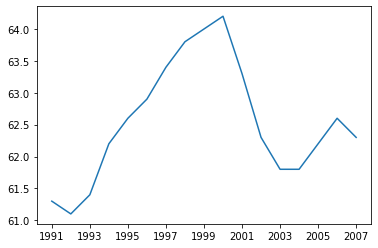

In [83]:
# Use the Series defined above to create a plot of each variable over time for
# the country of your choice. 
employment_us.plot()


<AxesSubplot:>

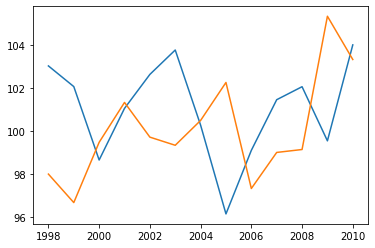

In [84]:
female_completion_us.plot()
male_completion_us.plot()

<AxesSubplot:>

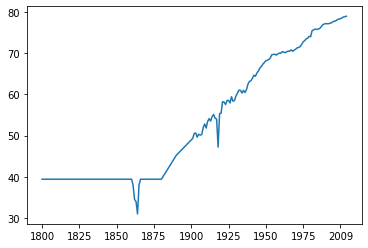

In [88]:
life_expectancy_us.plot()

<AxesSubplot:>

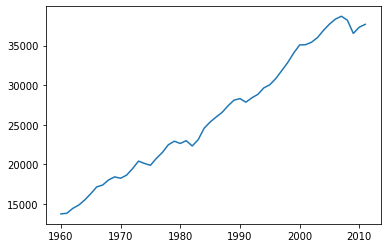

In [89]:
gdp_us.plot()